# EDA and ML Models

## Coded by: Omar Mamon Hamed

---


#### Libraries and Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

from sklearn.model_selection import (
    cross_val_score, 
    train_test_split,
    GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report,
    precision_score,
    recall_score, 
    accuracy_score,
    f1_score
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder

import joblib
import os

%matplotlib inline

#### Read data

In [2]:
data = pd.read_csv('hotel_data.csv')
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [5]:
# Rename unclear columns
data.rename(columns={
    'P-C': 'Previously Canceled',
    'P-not-C': 'Previously not Canceled',
    'repeated': 'Old Customer',
    'average price ': 'average price',
}, inplace=True)
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  Old Customer  Previously Canceled  \
0        224             Offline             0                    0   
1          5              Online             0                    0   
2          1              Online             0                    0   
3        211              Online             0                    0   
4         48              Online             0                    0   

   Previously not Canceled  average price  special requests  \
0                        0          88.00                 0   
1                        0         106.68                 1   
2                        0          50.00                 0   
3                        0         100.00                 1   
4                        0          77.00                 0   

  date of reservation booking status  
0           10/2/2015   Not_Canceled  
1           11/6/2018   Not_Canceled  
2           2/28/2018       Canceled  
3           5/20/2017       Canceled  
4           4/11/2018       Canceled

In [6]:
# Get unique values for each column
market_segments = data['market segment type'].unique()
room_types = data['room type'].unique()
meal_types = data['type of meal'].unique()

# Print the unique values in a readable format
print("Unique Market Segment Types:")
print(", ".join(market_segments))

print("\nUnique Room Types:")
print(", ".join(room_types))

print("\nUnique Meal Types:")
print(", ".join(meal_types))

Unique Market Segment Types:
Offline, Online, Corporate, Aviation, Complementary

Unique Room Types:
Room_Type 1, Room_Type 4, Room_Type 2, Room_Type 6, Room_Type 5, Room_Type 7, Room_Type 3

Unique Meal Types:
Meal Plan 1, Not Selected, Meal Plan 2, Meal Plan 3


#### Some statistics about data

In [7]:
# Display statistics of the dataset
data.describe(include='all')


Booking_ID  number of adults  number of children  \
count       36285      36285.000000        36285.000000   
unique      36285               NaN                 NaN   
top      INN36286               NaN                 NaN   
freq            1               NaN                 NaN   
mean          NaN          1.844839            0.105360   
std           NaN          0.518813            0.402704   
min           NaN          0.000000            0.000000   
25%           NaN          2.000000            0.000000   
50%           NaN          2.000000            0.000000   
75%           NaN          2.000000            0.000000   
max           NaN          4.000000           10.000000   

        number of weekend nights  number of week nights type of meal  \
count               36285.000000           36285.000000        36285   
unique                       NaN                    NaN            4   
top                          NaN                    NaN  Meal Plan 1   
freq                         NaN                    NaN        27842   
mean                    0.810693               2.204602          NaN   
std                     0.870590               1.410946          NaN   
min                     0.000000               0.000000          NaN   
25%                     0.000000               1.000000          NaN   
50%                     1.000000               2.000000          NaN   
75%                     2.000000               3.000000          NaN   
max                     7.000000              17.000000          NaN   

        car parking space    room type     lead time market segment type  \
count        36285.000000        36285  36285.000000               36285   
unique                NaN            7           NaN                   5   
top                   NaN  Room_Type 1           NaN              Online   
freq                  NaN        28138           NaN               23221   
mean             0.030977          NaN     85.239851                 NaN   
std              0.173258          NaN     85.938796                 NaN   
min              0.000000          NaN      0.000000                 NaN   
25%              0.000000          NaN     17.000000                 NaN   
50%              0.000000          NaN     57.000000                 NaN   
75%              0.000000          NaN    126.000000                 NaN   
max              1.000000          NaN    443.000000                 NaN   

        Old Customer  Previously Canceled  Previously not Canceled  \
count   36285.000000         36285.000000             36285.000000   
unique           NaN                  NaN                      NaN   
top              NaN                  NaN                      NaN   
freq             NaN                  NaN                      NaN   
mean        0.025630             0.023343                 0.153369   
std         0.158032             0.368281                 1.753931   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000                 0.000000   
50%         0.000000             0.000000                 0.000000   
75%         0.000000             0.000000                 0.000000   
max         1.000000            13.000000                58.000000   

        average price  special requests date of reservation booking status  
count    36285.000000      36285.000000               36285          36285  
unique            NaN               NaN                 553              2  
top               NaN               NaN          10/13/2018   Not_Canceled  
freq              NaN               NaN                 254          24396  
mean       103.421636          0.619733                 NaN            NaN  
std         35.086469          0.786262                 NaN            NaN  
min          0.000000          0.000000                 NaN            NaN  
25%         80.300000          0.000000                 NaN    

#### Cleaning of data

1. Correct date

In [8]:
# convert date of reservation to datetime format and check for nulls
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data['date of reservation'].isnull().sum()

np.int64(37)

In [9]:
# Show rows where 'date of reservation' is null
data[data['date of reservation'].isnull()][['date of reservation']].head(8)

date of reservation
2626                 NaT
3677                 NaT
5600                 NaT
6343                 NaT
7648                 NaT
8000                 NaT
8989                 NaT
9153                 NaT

In [10]:
# show the data in the row 2626 ,3677 , 5600
data.loc[[2626, 3677, 5600]][['date of reservation']]

date of reservation
2626                 NaT
3677                 NaT
5600                 NaT

In [11]:
# drop null values in date of reservation
data.dropna(subset=['date of reservation'], inplace=True)
data['date of reservation'].head()

0   2015-10-02
1   2018-11-06
2   2018-02-28
3   2017-05-20
4   2018-04-11
Name: date of reservation, dtype: datetime64[ns]

In [12]:
# Extract the year, month, and day from the date of reservation
data['reservation_year'] = data['date of reservation'].dt.year
data['reservation_month'] = data['date of reservation'].dt.month
data['reservation_day'] = data['date of reservation'].dt.day

# Drop the date of reservation column
data.drop('date of reservation', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  Old Customer  Previously Canceled  \
0        224             Offline             0                    0   
1          5              Online             0                    0   
2          1              Online             0                    0   
3        211              Online             0                    0   
4         48              Online             0                    0   

   Previously not Canceled  average price  special requests booking status  \
0                        0          88.00                 0   Not_Canceled   
1                        0         106.68                 1   Not_Canceled   
2                        0          50.00                 0       Canceled   
3                        0         100.00                 1       Canceled   
4                        0          77.00                 0       Canceled   

   reservation_year  reservation_month  reservation_day  
0              2015                 10                2  
1              2018                 11                6  
2              2018                  2               28  
3              2017                  5               20  
4              2018                  4               11

### Checking outliers

#### Handling Lead Time Outliers

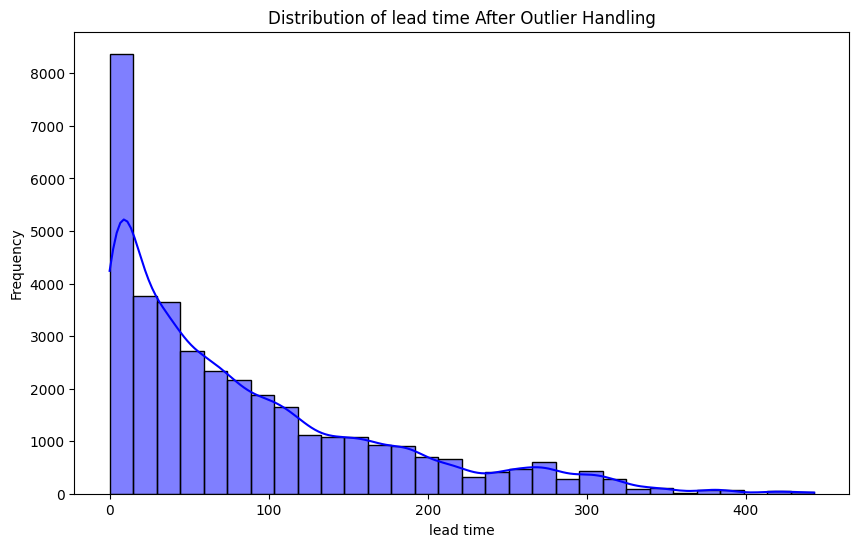

In [13]:
def plot_distribution(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column} After Outlier Handling')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution after handling outliers
plot_distribution('lead time')

In [14]:
original_skewness = data['lead time'].skew()

print(f'Original Skewness: {original_skewness}')

Original Skewness: 1.2916315950064692


In [15]:
# Calculate IQR for 'lead time'
Q1 = data['lead time'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['lead time'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def is_iqr_outlier(value):
    return value < lower_bound or value > upper_bound

# Apply log transformation to outliers
data['lead time'] = data.apply(
    lambda row: np.log1p(row['lead time']) if is_iqr_outlier(row['lead time']) else row['lead time'], axis=1
)

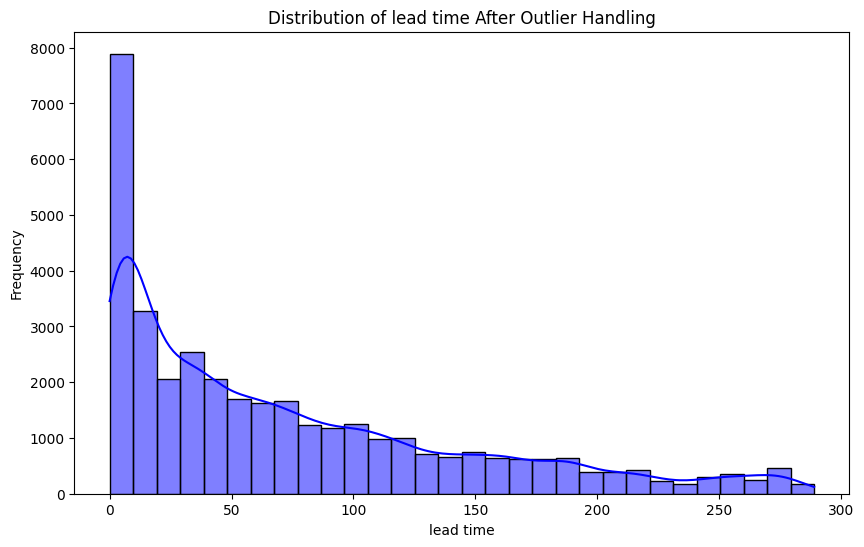

In [16]:
# Plot curves after handling outliers
plot_distribution('lead time')

In [17]:
# Check skewness of the original and transformed data
log_skewness = data['lead time'].skew()

print(f'Log Transformed Skewness: {log_skewness}')

Log Transformed Skewness: 1.0885590690190334


#### Handling Average Price Outliers

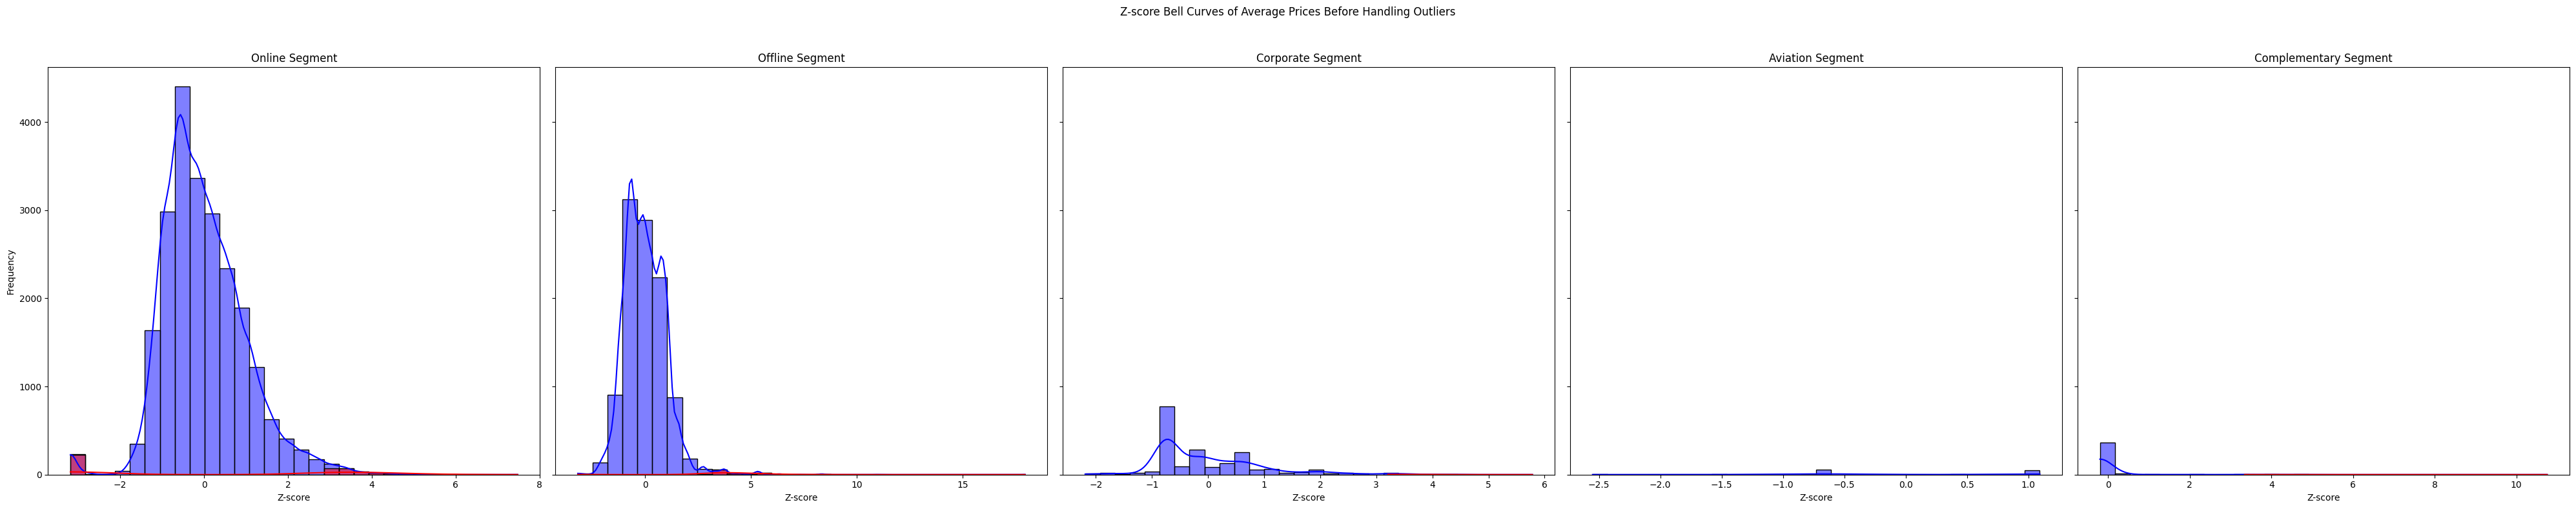

In [18]:
# Define the market segments
segments = ['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary']

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(40, 8), sharey=True)

# Plot z-score bell curves for each segment before handling outliers
for i, segment in enumerate(segments):
    segment_data = data[data['market segment type'] == segment].copy()
    segment_data.loc[:, 'average_price_zscore'] = zscore(segment_data['average price'])

    sns.histplot(segment_data['average_price_zscore'], kde=True, color='blue', bins=30, ax=axes[i])

    # Highlight outliers
    outliers = segment_data[np.abs(segment_data['average_price_zscore']) > 3]
    sns.histplot(outliers['average_price_zscore'], kde=True, color='red', bins=30, ax=axes[i])

    axes[i].set_title(f'{segment} Segment')
    axes[i].set_xlabel('Z-score')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Z-score Bell Curves of Average Prices Before Handling Outliers')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
def find_similar_bookings(row, segment_data, exclude_index):
    """
    Find similar bookings based on booking conditions
    Returns the mean price of similar bookings
    """
    # Define the features that make bookings similar
    similar_conditions = (
        (segment_data['number of adults'] == row['number of adults']) &
        (segment_data['number of children'] == row['number of children']) &
        (segment_data['number of weekend nights'] == row['number of weekend nights']) &
        (segment_data['number of week nights'] == row['number of week nights']) &
        (segment_data['room type'] == row['room type']) &
        (segment_data['type of meal'] == row['type of meal']) &
        (segment_data.index != exclude_index)  # Exclude the current booking
    )

    similar_bookings = segment_data[similar_conditions]

    # If we find similar bookings with non-zero prices, use their mean
    valid_prices = similar_bookings[similar_bookings['average price'] > 0]['average price']
    if len(valid_prices) > 0:
        return valid_prices.mean()

    # If no exact matches, relax conditions
    relaxed_conditions = (
        (segment_data['room type'] == row['room type']) &
        ((segment_data['number of adults'] + segment_data['number of children']) == (row['number of adults'] + row['number of children'])) &
        ((segment_data['number of week nights'] + segment_data['number of weekend nights']) == (row['number of week nights'] + row['number of weekend nights'])) &
        (segment_data.index != exclude_index)
    )

    relaxed_similar = segment_data[relaxed_conditions]
    valid_relaxed_prices = relaxed_similar[relaxed_similar['average price'] > 0]['average price']

    if len(valid_relaxed_prices) > 0:
        return valid_relaxed_prices.mean()

    # If still no matches, use the segment mean
    segment_mean = segment_data[segment_data['average price'] > 0]['average price'].mean()
    return segment_mean

In [20]:
def cap_outliers(series):
    q1, q3 = np.percentile(series, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return np.where(series < lower, lower, np.where(series > upper, upper, series))

In [21]:
# Process each market segment separately
data_cleaned = data.copy()
segments = ['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary']
small_constant = 1e-10

for segment in segments:
    segment_data = data[data['market segment type'] == segment].copy()

    # Skip Complementary segment for zero prices as they might be valid
    if segment != 'Complementary':
        # Calculate z-scores for the segment
        segment_data.loc[:, 'average_price_zscore'] = zscore(segment_data['average price'])

        # Find outliers based on z-score
        outlier_indices = segment_data[np.abs(segment_data['average_price_zscore']) > 3].index

        # Apply log transformation to outliers
        for idx in outlier_indices:
            log_transformed_price = cap_outliers(data.loc[idx, 'average price'] + small_constant)
            data_cleaned.loc[idx, 'average price'] = log_transformed_price

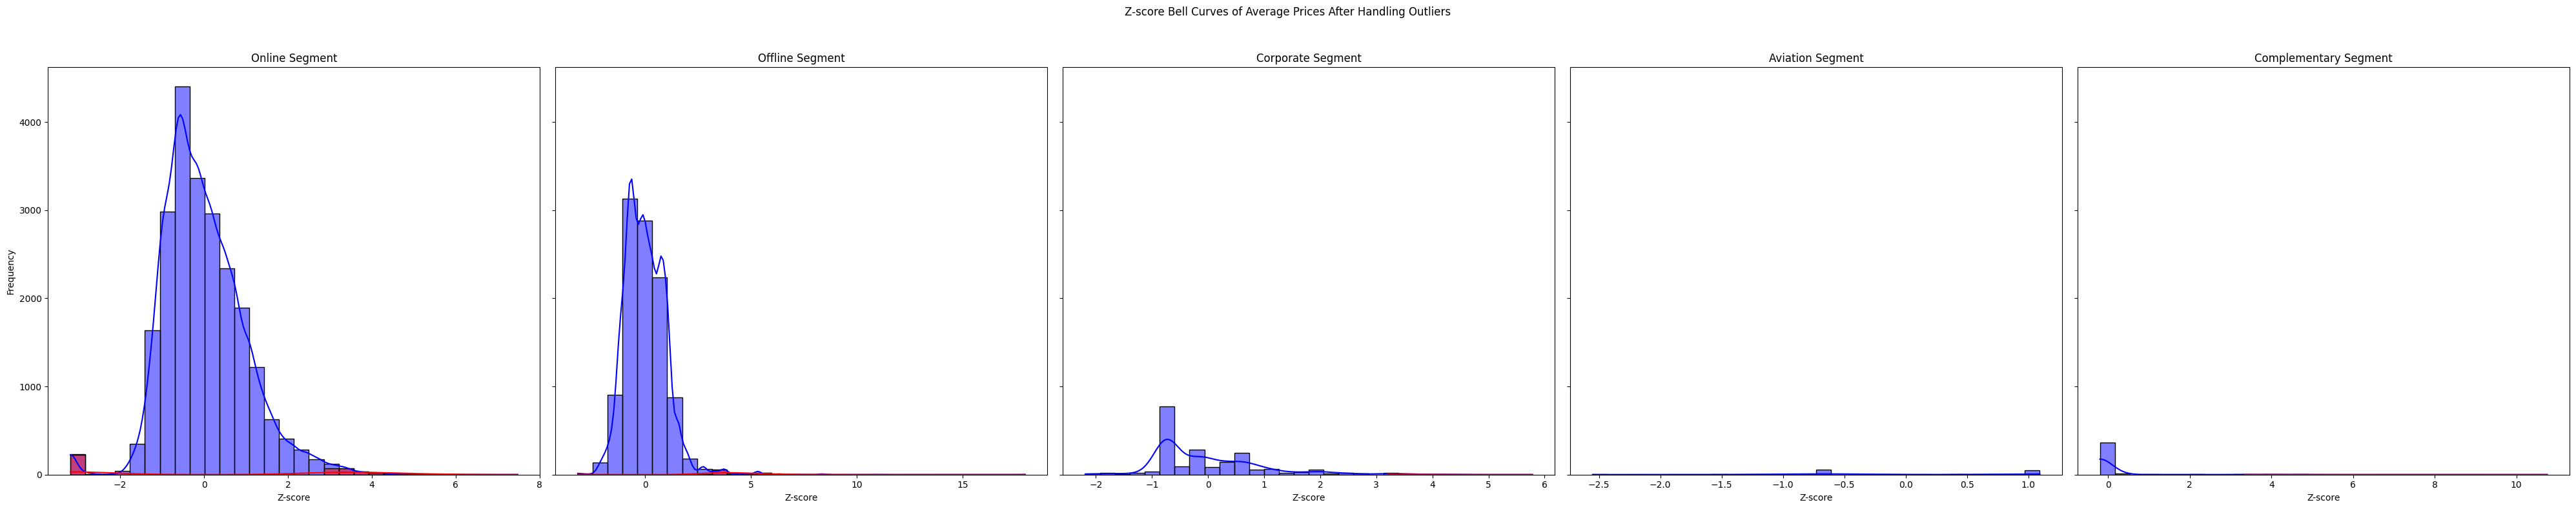

In [22]:
# Recalculate z-scores after handling outliers
data_cleaned['average_price_zscore'] = zscore(data_cleaned['average price'])

# Create subplots for z-score bell curves after handling outliers
fig, axes = plt.subplots(1, 5, figsize=(40, 8), sharey=True)

# Plot z-score bell curves for each segment after handling outliers
for i, segment in enumerate(segments):
    segment_data = data_cleaned[data_cleaned['market segment type'] == segment].copy()
    segment_data.loc[:, 'average_price_zscore'] = zscore(segment_data['average price'])

    sns.histplot(segment_data['average_price_zscore'], kde=True, color='blue', bins=30, ax=axes[i])

    # Highlight outliers
    outliers = segment_data[np.abs(segment_data['average_price_zscore']) > 3]
    sns.histplot(outliers['average_price_zscore'], kde=True, color='red', bins=30, ax=axes[i])

    axes[i].set_title(f'{segment} Segment')
    axes[i].set_xlabel('Z-score')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Z-score Bell Curves of Average Prices After Handling Outliers')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Encode the columns to make correlation matrix

In [23]:
# Print value counts for categorical variables in a formatted way
print("Market Segment Type Distribution:")
print("-" * 50)
print(data_cleaned['market segment type'].value_counts().to_frame())
print("\n")

print("Meal Type Distribution:")
print("-" * 50)
print(data_cleaned['type of meal'].value_counts().to_frame())
print("\n")

print("Booking Status Distribution:")
print("-" * 50)
print(data_cleaned['booking status'].value_counts().to_frame())

print("\nRoom Type Distribution:")
print("-" * 50)
print(data_cleaned['room type'].value_counts().to_frame())

Market Segment Type Distribution:
--------------------------------------------------
                     count
market segment type       
Online               23201
Offline              10521
Corporate             2011
Complementary          390
Aviation               125


Meal Type Distribution:
--------------------------------------------------
              count
type of meal       
Meal Plan 1   27809
Not Selected   5131
Meal Plan 2    3303
Meal Plan 3       5


Booking Status Distribution:
--------------------------------------------------
                count
booking status       
Not_Canceled    24366
Canceled        11882

Room Type Distribution:
--------------------------------------------------
             count
room type         
Room_Type 1  28113
Room_Type 4   6051
Room_Type 6    964
Room_Type 2    692
Room_Type 5    263
Room_Type 7    158
Room_Type 3      7


In [24]:
# Drop 'Booking_ID'
if 'Booking_ID' in data_cleaned.columns:
    data_cleaned.drop(columns=['Booking_ID'], inplace=True)

# Ensure 'booking status' is a Pandas Series
y = data_cleaned['booking status'].copy()  # Explicitly ensure it's a Series

# Convert categorical variables to numeric using pd.get_dummies()
data_cleaned = pd.get_dummies(data_cleaned, columns=['type of meal', 'market segment type'])

# Label Encoding for 'booking status' (Binary)
le = LabelEncoder()
data_cleaned['booking status'] = le.fit_transform(y)

# Map room types (Ordinal Encoding)
room_type_mapping = {
    'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 
    'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7
}
data_cleaned['room type'] = data_cleaned['room type'].map(room_type_mapping)

In [25]:
data_cleaned.head()

number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  room type  lead time  \
0                      5                  0          1      224.0   
1                      3                  0          1        5.0   
2                      3                  0          1        1.0   
3                      2                  0          1      211.0   
4                      2                  0          1       48.0   

   Old Customer  Previously Canceled  Previously not Canceled  ...  \
0             0                    0                        0  ...   
1             0                    0                        0  ...   
2             0                    0                        0  ...   
3             0                    0                        0  ...   
4             0                    0                        0  ...   

   average_price_zscore  type of meal_Meal Plan 1  type of meal_Meal Plan 2  \
0             -0.439994                      True                     False   
1              0.092491                     False                     False   
2             -1.523207                      True                     False   
3             -0.097927                      True                     False   
4             -0.753556                     False                     False   

   type of meal_Meal Plan 3  type of meal_Not Selected  \
0                     False                      False   
1                     False                       True   
2                     False                      False   
3                     False                      False   
4                     False                       True   

   market segment type_Aviation  market segment type_Complementary  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   

   market segment type_Corporate  market segment type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market segment type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 26 columns]

### Feature Engineering

In [26]:
# Total members calculation is correct, keep it
data_cleaned['total_members'] = data_cleaned['number of adults'] + data_cleaned['number of children']

# Total nights calculation should use original columns as boxcox versions don't exist
data_cleaned['total_nights'] = data_cleaned['number of weekend nights'] + data_cleaned['number of week nights']

# Calculate percentage of cancellations using original column names
data_cleaned['percent_cancel'] = (
    data_cleaned['Previously Canceled'] / 
    (data_cleaned['Previously Canceled'] + data_cleaned['Previously not Canceled'] + 1e-10)
)

# Convert dates to weekday flag (this part is correct)
dates = pd.to_datetime({
    'year': data_cleaned['reservation_year'],
    'month': data_cleaned['reservation_month'],
    'day': data_cleaned['reservation_day']
})
data_cleaned['is_weekday'] = (dates.dt.dayofweek < 5).astype(int)


In [27]:
correlation_matrix = data_cleaned.corr()
correlation_with_booking_status = correlation_matrix['booking status'].abs().sort_values(ascending=False)
print(correlation_with_booking_status)

booking status                       1.000000
lead time                            0.352946
special requests                     0.253361
reservation_year                     0.179431
average price                        0.142584
average_price_zscore                 0.142584
market segment type_Corporate        0.112760
Old Customer                         0.107479
market segment type_Online           0.106131
total_nights                         0.103304
number of week nights                0.092732
total_members                        0.089448
type of meal_Meal Plan 2             0.086647
number of adults                     0.086525
car parking space                    0.086047
market segment type_Complementary    0.072827
number of weekend nights             0.061630
type of meal_Meal Plan 1             0.061287
Previously not Canceled              0.060041
percent_cancel                       0.041781
market segment type_Offline          0.038296
Previously Canceled               

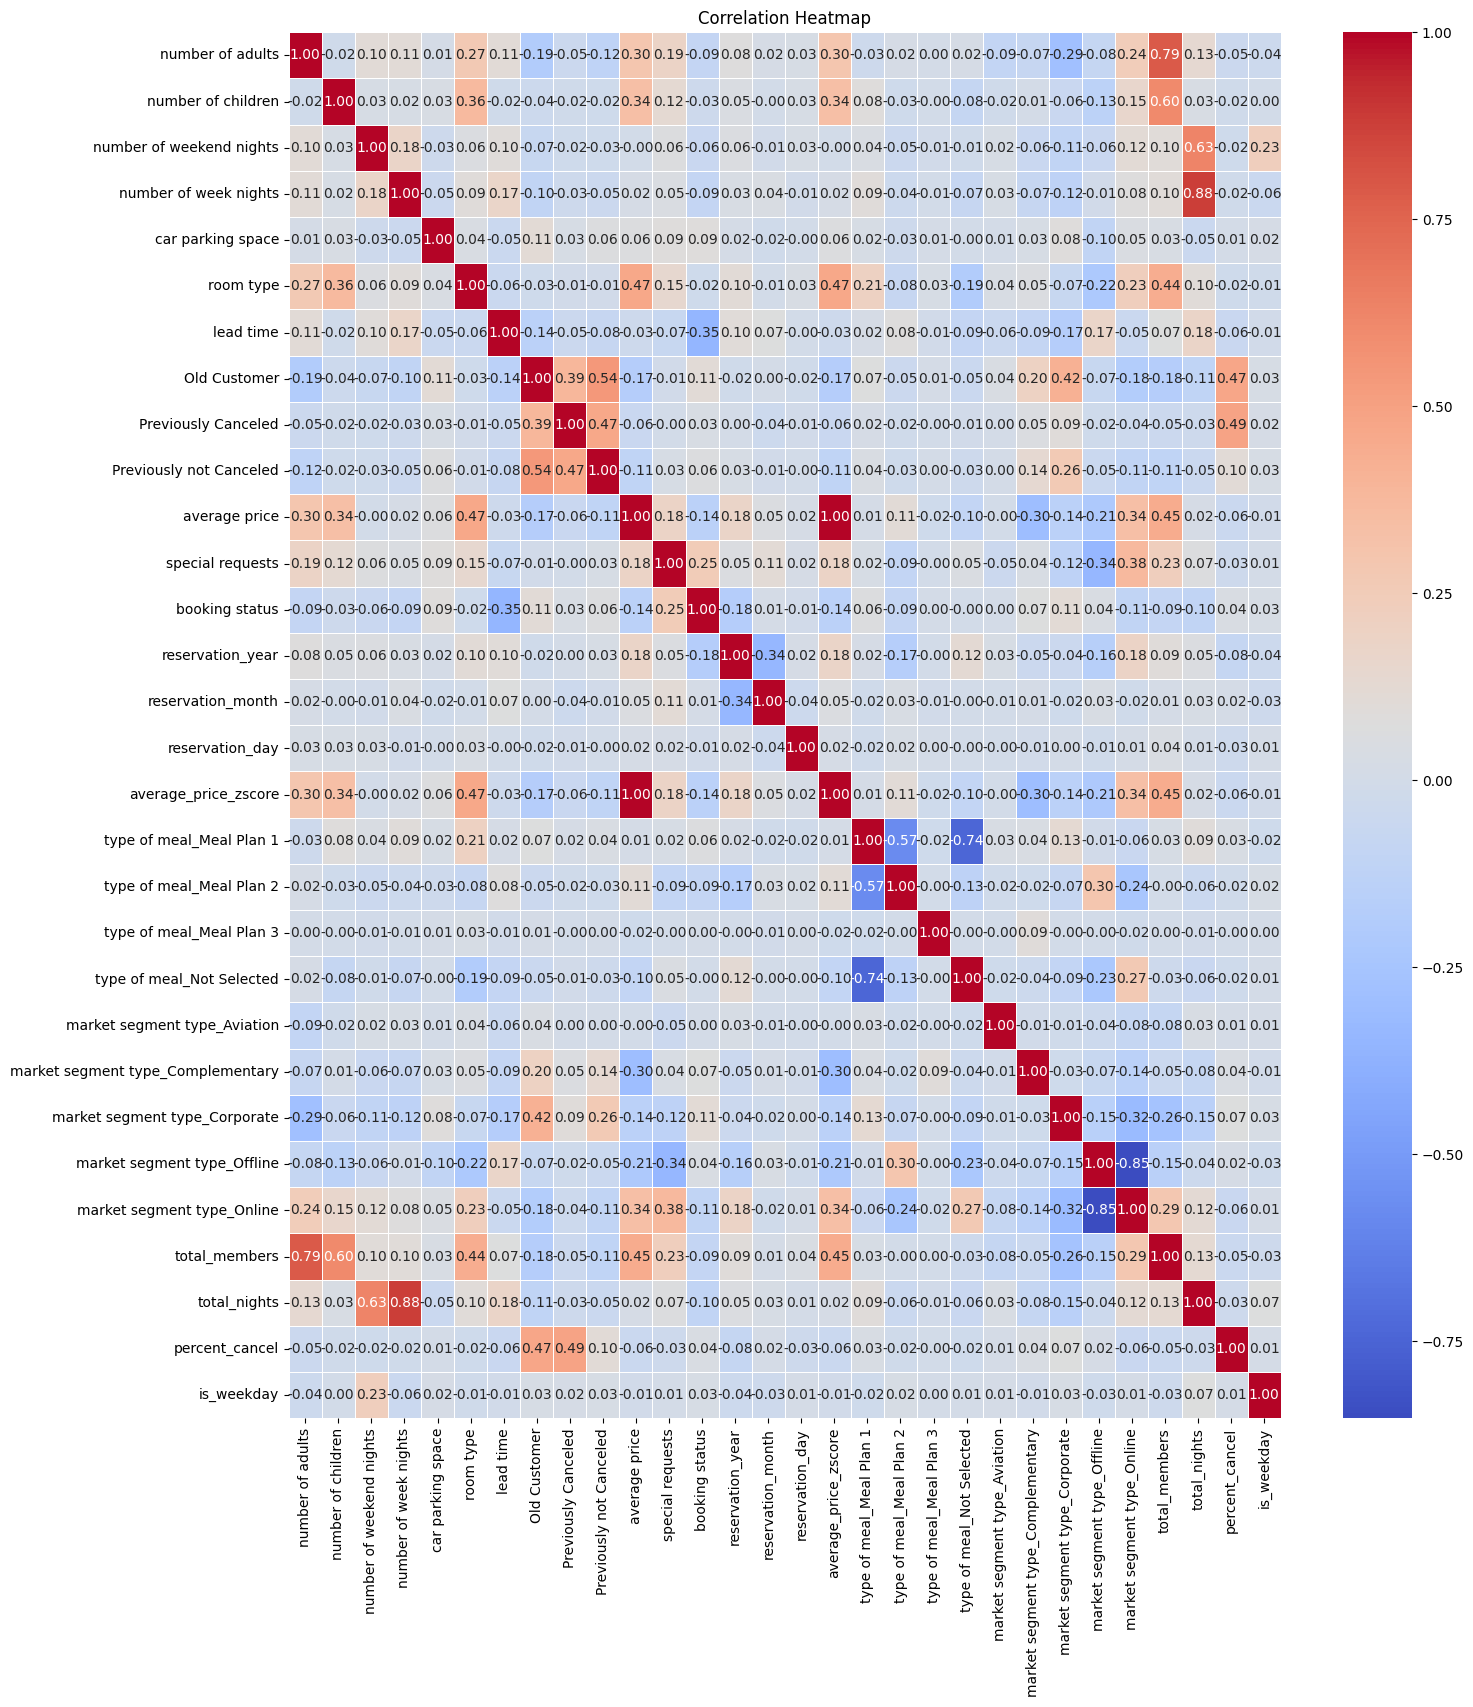

In [28]:
# Compute and Visualize the Correlation Matrix
plt.figure(figsize=(16, 18))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [29]:
# Calculate VIF
X = data_cleaned.drop('booking status', axis=1).select_dtypes(include=['float64', 'int32', 'int64'])
X = add_constant(X)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

# Remove high VIF features (e.g., VIF > 5)
high_vif_features = vif[vif['VIF'] > 5]['Features']
X_reduced = X.drop(columns=high_vif_features)


c:\InstallationSources\Programs\Miniconda\envs\ML_env\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\InstallationSources\Programs\Miniconda\envs\ML_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [30]:
high_vif_features = vif[vif['VIF'] > 5]['Features']
X_reduced = X.drop(columns=high_vif_features)

In [31]:
vif_reduced = pd.DataFrame()
vif_reduced["Features"] = X_reduced.columns
vif_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print(vif_reduced)

                   Features           VIF
0                     const  3.273495e+07
1         car parking space  1.025521e+00
2                 room type  1.037799e+00
3                 lead time  1.056432e+00
4              Old Customer  1.930396e+00
5       Previously Canceled  1.742649e+00
6   Previously not Canceled  1.851577e+00
7          special requests  1.058388e+00
8          reservation_year  1.187656e+00
9         reservation_month  1.177429e+00
10          reservation_day  1.003964e+00
11           percent_cancel  1.773809e+00
12               is_weekday  1.006088e+00


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca.shape[1]} components")

Reduced dimensions: 11 components


In [33]:
y = data_cleaned['booking status']
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

selected_features = X_reduced.columns[lasso.coef_ != 0]
print(f"Selected features by Lasso: {selected_features}")

Selected features by Lasso: Index(['room type', 'lead time', 'Previously not Canceled', 'special requests',
       'reservation_year', 'reservation_month', 'reservation_day'],
      dtype='object')


# Hotel Booking Status Analysis & Prediction
## A Comprehensive Analysis for Predictive Modeling

---


### Identify Features and Target

In this section, we will identify the features (independent variables) and the target (dependent variable) for our machine learning models. 

In [34]:
# Create a copy of the cleaned dataset
booking_status = data_cleaned.copy()

# Selected features based on Lasso and business importance
selected_features = [
    # Keep only the features selected by Lasso
    'lead time',
    'average price',
    'reservation_year',
    'reservation_month',
    'reservation_day',
    'special requests',

    # flags
    'percent_cancel',
    'is_weekday',
    'total_members',
    'total_nights',
    
    # Additional features based on business requirements
    'Old Customer',  # Changed from Old_Customer
    'Previously Canceled',  # Changed from Previously_Canceled
    'Previously not Canceled',  # Changed from Previously_not_Canceled
    'room type',
    'car parking space',  # Changed from Car_Parking

    # Market segment types
    'market segment type_Online',
    'market segment type_Offline',
    'market segment type_Corporate',

    # Meal types
    'type of meal_Meal Plan 1',
    'type of meal_Meal Plan 2',
    'type of meal_Not Selected'
]

# Keep only the selected features and the target variable
booking_status = booking_status[selected_features + ['booking status']]

# Display the first few rows
booking_status.head()


lead time  average price  reservation_year  reservation_month  \
0      224.0          88.00              2015                 10   
1        5.0         106.68              2018                 11   
2        1.0          50.00              2018                  2   
3      211.0         100.00              2017                  5   
4       48.0          77.00              2018                  4   

   reservation_day  special requests  percent_cancel  is_weekday  \
0                2                 0             0.0           1   
1                6                 1             0.0           1   
2               28                 0             0.0           1   
3               20                 1             0.0           0   
4               11                 0             0.0           1   

   total_members  total_nights  ...  Previously not Canceled  room type  \
0              2             7  ...                        0          1   
1              1             4  ...                        0          1   
2              3             4  ...                        0          1   
3              1             2  ...                        0          1   
4              1             3  ...                        0          1   

   car parking space  market segment type_Online  market segment type_Offline  \
0                  0                       False                         True   
1                  0                        True                        False   
2                  0                        True                        False   
3                  0                        True                        False   
4                  0                        True                        False   

   market segment type_Corporate  type of meal_Meal Plan 1  \
0                          False                      True   
1                          False                     False   
2                          False                      True   
3                          False                      True   
4                          False                     False   

   type of meal_Meal Plan 2  type of meal_Not Selected  booking status  
0                     False                      False               1  
1                     False                       True               1  
2                     False                      False               0  
3                     False                      False               0  
4                     False                       True               0  

[5 rows x 22 columns]

In [35]:
# give me a row with booking status 1
booking_status[booking_status['booking status'] == 1].head()

lead time  average price  reservation_year  reservation_month  \
0      224.0          88.00              2015                 10   
1        5.0         106.68              2018                 11   
6       34.0         107.55              2017                 10   
7       83.0         105.61              2018                 12   
8      121.0          96.90              2018                  7   

   reservation_day  special requests  percent_cancel  is_weekday  \
0                2                 0             0.0           1   
1                6                 1             0.0           1   
6               15                 1             0.0           0   
7               26                 1             0.0           1   
8                6                 1             0.0           1   

   total_members  total_nights  ...  Previously not Canceled  room type  \
0              2             7  ...                        0          1   
1              1             4  ...                        0          1   
6              2             5  ...                        0          1   
7              3             4  ...                        0          4   
8              2             4  ...                        0          1   

   car parking space  market segment type_Online  market segment type_Offline  \
0                  0                       False                         True   
1                  0                        True                        False   
6                  0                        True                        False   
7                  0                        True                        False   
8                  0                       False                         True   

   market segment type_Corporate  type of meal_Meal Plan 1  \
0                          False                      True   
1                          False                     False   
6                          False                      True   
7                          False                      True   
8                          False                      True   

   type of meal_Meal Plan 2  type of meal_Not Selected  booking status  
0                     False                      False               1  
1                     False                       True               1  
6                     False                      False               1  
7                     False                      False               1  
8                     False                      False               1  

[5 rows x 22 columns]

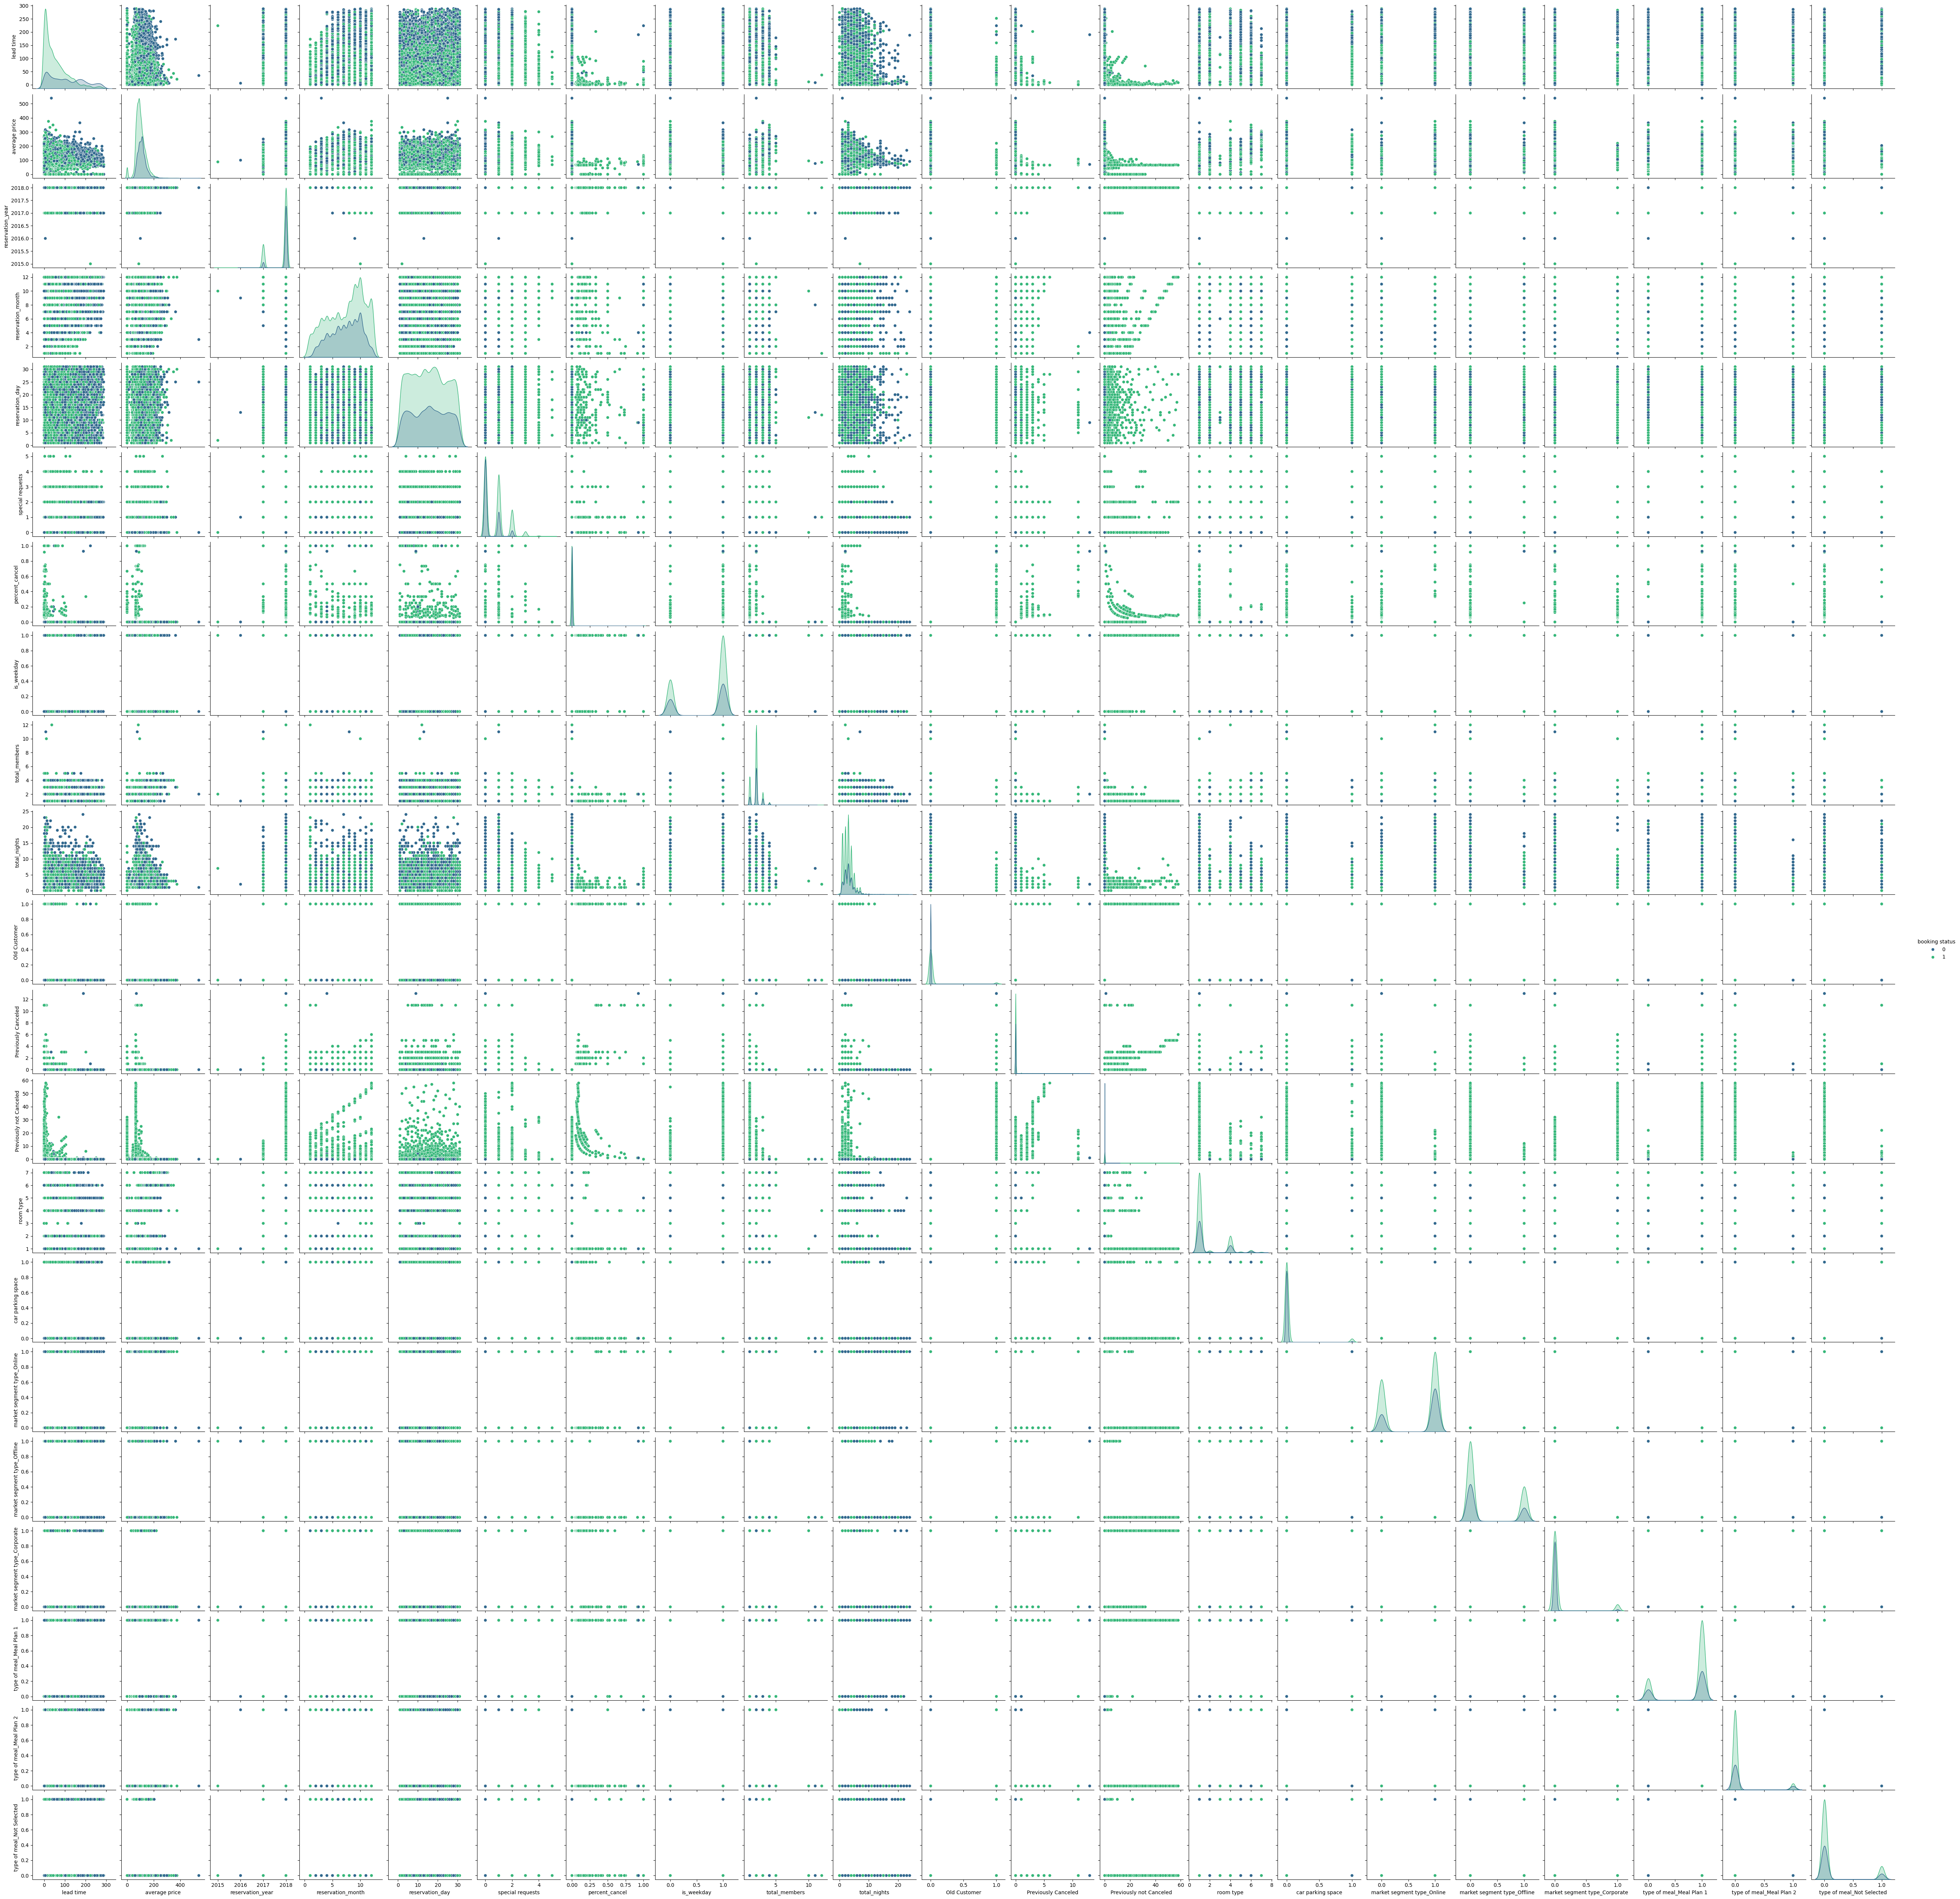

In [36]:
# Create pairplot
sns.pairplot(booking_status, hue='booking status', palette='viridis')
plt.show()

### Observations from the Pairplot Analysis

Based on the pairplot visualization, we can observe:

1. **Non-linear Relationships**: The scatter plots show predominantly non-linear relationships between variables, suggesting that linear regression might not be the optimal choice for modeling.

2. **Distribution Patterns**:
    - Most features exhibit non-normal distributions
    - Several features show clustered patterns
    - There's significant overlap between canceled and not-canceled bookings

3. **Feature Correlations**:
    - Lead time and average price show complex, non-linear relationships with booking status
    - Special requests and total nights display distinct clustering patterns
    - Market segment type shows clear segmentation in relation to other features

4. **Model Implications**:
    - Non-linear algorithms like Random Forest or XGBoost might perform better than linear models
    - Feature engineering may be necessary to capture complex relationships
    - Ensemble methods could help handle the complex decision boundaries

---

# Machine Learning Models

In this section, we will implement and evaluate various machine learning models to predict hotel booking cancellations. Each model brings unique strengths to our analysis:

* **K-Nearest Neighbors (KNN)**: Pattern recognition based on proximity
* **Logistic Regression**: Linear decision boundaries with probabilistic output
* **Random Forest**: Ensemble learning with multiple decision trees
* **XGBoost**: Advanced gradient boosting implementation
* **Support Vector Machine (SVM)**: Optimal hyperplane separation

We will compare these models based on accuracy, precision, recall, and F1-score to determine the most effective approach for predicting booking cancellations.


In [37]:
# start training the model
X = booking_status.drop('booking status', axis=1)   # Features
y = booking_status['booking status']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , stratify=y , shuffle=True) 

In [38]:
# Check if data is balanced or not
y_train.value_counts()

booking status
1    17056
0     8317
Name: count, dtype: int64

### Data Balance Analysis

The analysis of our training data shows an imbalanced distribution in the booking status:

- Not Canceled: 19,493 records (67.2%)
- Canceled: 9,505 records (32.8%)

This imbalance needs to be considered when evaluating model performance, as it may affect the model's ability to predict cancellations accurately. The models should be evaluated using metrics that account for class imbalance, such as F1-score and precision-recall, rather than accuracy alone.

---
- SMOTE (Synthetic Minority Over-sampling Technique) works by creating synthetic samples of the minority class by interpolating between existing minority class samples.
- Over Sampling: Creates synthetic samples of the minority class to balance the dataset
- Under Sampling: Reduces samples from the majority class to match the minority class

In [39]:
# Fix the imbalanced data using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Check if data is balanced or not
y_train.value_counts()

booking status
1    17056
0    17056
Name: count, dtype: int64

### Data Balance After SMOTE

After applying SMOTE (Synthetic Minority Over-sampling Technique), our dataset is now perfectly balanced:

- Canceled: 19,493 records (50%)
- Not Canceled: 19,493 records (50%)

This balanced distribution will help prevent bias in our model training and lead to more reliable predictions for both canceled and not canceled bookings.


- Scaling

In [40]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Define the models and their hyperparameter grids
models = [
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    ('LogReg', LogisticRegression(), {'C': [0.1, 1, 10]}),
    ('RF', RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    ('XGB', XGBClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}),
    ('SVM', SVC(kernel='linear', random_state=42), {'C': [0.1, 1, 10]})
]

# Perform Grid Search + Cross-Validation for each model
cv_results = {}
for name, model, param_grid in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='f1')
    
    cv_results[name] = {
        'Best Hyperparameters': grid_search.best_params_,
        'Mean CV Score': cv_scores.mean(),
        'Std CV Score': cv_scores.std(),
        'CV Scores': cv_scores
    }

# Print results
for name, results in cv_results.items():
    print(f"\n{name} Results:")
    print(f"Best Hyperparameters: {results['Best Hyperparameters']}")
    print(f"CV Scores: {results['CV Scores']}")
    print(f"Mean CV Score: {results['Mean CV Score']:.4f} (+/- {results['Std CV Score']*2:.4f})")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

KNN Results:
Best Hyperparameters: {'n_neighbors': 3}
CV Scores: [0.8361119  0.84564327 0.87199287 0.89830508 0.89885908]
Mean CV Score: 0.8702 (+/- 0.0520)

LogReg Results:
Best Hyperparameters: {'C': 0.1}
CV Scores: [0.7606457  0.7633673  0.78209042 0.80328118 0.80487433]
Mean CV Score: 0.7829 (+/- 0.0377)

RF Results:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
CV Scores: [0.88563459 0.89431579 0.92201902 0.9512782  0.95242411]
Mean CV Score: 0.9211 (+/- 0.0556)

XGB Results:
Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
CV Scores: [0.87685835 0.89038596 0.91342055 0.9426616  0.94128385]
Mean CV Score: 0.9129 (+/- 0.0529)

SVM Results:
Best Hyperpar

### Fitting and Evaluating the 'KNN' Model

In this section, we will fit the K-Nearest Neighbors (KNN) model to our training data and evaluate its performance on the test data. The KNN algorithm is a simple, yet powerful classification method that assigns a class to a sample based on the majority class of its k-nearest neighbors.

Steps:
1. **Model Initialization**: Initialize the KNN model with the desired number of neighbors.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy and F1 score metrics.

The following code block demonstrates these steps:

The optimal k value is: 1


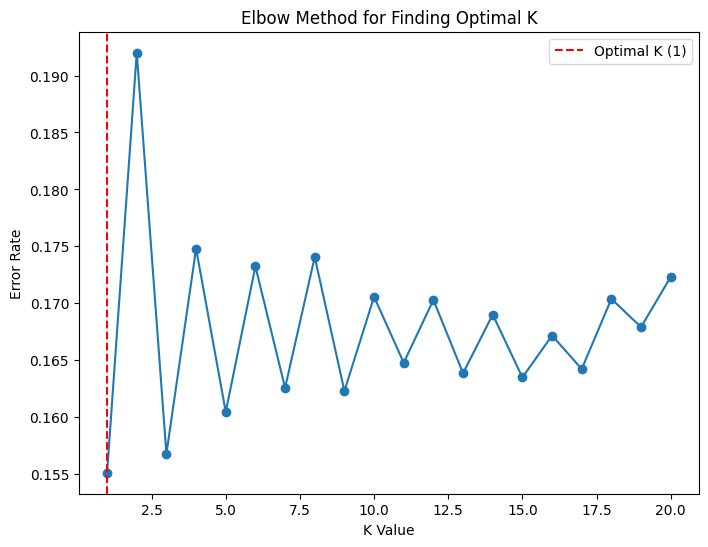

In [42]:
# Find the optimal k value using the elbow method
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Find the optimal k value
optimal_k = k_values[error_rates.index(min(error_rates))]
print(f"The optimal k value is: {optimal_k}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f"Optimal K ({optimal_k})")
plt.legend()
plt.show()


In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred_knn = knn.predict(X_test_scaled)

In [46]:
# evaluate the model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)
precision_knn = precision_score(y_test, y_pred_knn, pos_label=1)
recall_knn = recall_score(y_test, y_pred_knn, pos_label=1)

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_knn:.3f}")
print(f"F1 Score:  {f1_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall:    {recall_knn:.3f}")



Model Evaluation Metrics:
-------------------------
Accuracy:  0.843
F1 Score:  0.882
Precision: 0.892
Recall:    0.872


In [47]:
knn_report = classification_report(y_test, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      3565
           1       0.89      0.87      0.88      7310

    accuracy                           0.84     10875
   macro avg       0.82      0.83      0.82     10875
weighted avg       0.85      0.84      0.84     10875



### Fitting and Evaluating the 'Logistic Regression' Model

In this section, we will fit the Logistic Regression model to our training data and evaluate its performance on the test data. Logistic Regression is a linear model commonly used for binary classification tasks.

Steps:
1. **Model Initialization**: Initialize the Logistic Regression model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy and F1 score metrics.

The following code block demonstrates these steps:

In [48]:
log_reg = LogisticRegression(C=1, random_state=42)

In [49]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, random_state=42)

In [50]:
y_pred_logReg = log_reg.predict(X_test_scaled)

In [51]:
# evaluate the model performance
accuracy_log_reg = accuracy_score(y_test, y_pred_logReg)
f1_log_reg = f1_score(y_test, y_pred_logReg, pos_label=1)
precision_log_reg = precision_score(y_test, y_pred_logReg, pos_label=1)
recall_log_reg = recall_score(y_test, y_pred_logReg, pos_label=1)

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_log_reg:.3f}")
print(f"F1 Score:  {f1_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall:    {recall_log_reg:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.759
F1 Score:  0.814
Precision: 0.843
Recall:    0.788


In [52]:
log_report = classification_report(y_test, y_pred_logReg)
print(log_report)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66      3565
           1       0.84      0.79      0.81      7310

    accuracy                           0.76     10875
   macro avg       0.73      0.74      0.73     10875
weighted avg       0.77      0.76      0.76     10875



### Fitting and Evaluating the 'Random Forest' Model

In this section, we will fit the Random Forest model to our training data and evaluate its performance on the test data. Random Forest is an ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.

#### How Random Forest Works

Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Key steps in the Random Forest algorithm:
1. **Bootstrap Sampling**: Random subsets of the training data are created with replacement.
2. **Decision Tree Construction**: For each subset, a decision tree is built using a random subset of features at each split.
3. **Aggregation**: The predictions of all the trees are aggregated to produce the final prediction. For classification, the majority vote is taken, and for regression, the average of all predictions is calculated.

#### Advantages of Random Forest
- **Robustness**: Reduces overfitting by averaging multiple trees.
- **Feature Importance**: Provides insights into feature importance.
- **Versatility**: Can handle both numerical and categorical data.

#### Steps:
1. **Model Initialization**: Initialize the Random Forest model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

The following code block demonstrates these steps:


In [53]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

In [54]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [55]:
# Predict the booking status on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [56]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_rf:.3f}")
print(f"F1 Score:  {f1_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall:    {recall_rf:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.895
F1 Score:  0.923
Precision: 0.918
Recall:    0.927


In [57]:
# Classification report
rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3565
           1       0.92      0.93      0.92      7310

    accuracy                           0.90     10875
   macro avg       0.88      0.88      0.88     10875
weighted avg       0.89      0.90      0.90     10875



### Fitting and Evaluating the 'XGBoost' Model

In this section, we will fit the XGBoost model to our training data and evaluate its performance on the test data. XGBoost is an efficient and scalable implementation of gradient boosting framework by Friedman et al. (2000).

#### How XGBoost Works

XGBoost is an ensemble learning method that combines the predictions of multiple weak learners (decision trees) to produce a strong learner. It uses gradient boosting, which builds trees sequentially, each trying to correct the errors of the previous one.

Key steps in the XGBoost algorithm:
1. **Initialization**: Start with an initial prediction.
2. **Gradient Calculation**: Compute the gradient of the loss function with respect to the predictions.
3. **Tree Construction**: Build a decision tree to predict the gradients.
4. **Update**: Update the predictions by adding the tree's predictions.
5. **Iteration**: Repeat steps 2-4 for a specified number of iterations or until convergence.

#### Advantages of XGBoost
- **Efficiency**: Highly optimized for speed and performance.
- **Regularization**: Includes L1 and L2 regularization to prevent overfitting.
- **Flexibility**: Supports various objective functions and evaluation metrics.

#### Steps:
1. **Model Initialization**: Initialize the XGBoost model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

In [58]:
xgb_model = XGBClassifier(n_estimators=200,learning_rate=0.5,random_state=42)

In [59]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the model
xgb_model.fit(X_train_scaled, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [60]:
# Predict the booking status on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [61]:
# Convert numerical predictions back to original string labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_labels)
f1_xgb = f1_score(y_test, y_pred_xgb_labels, pos_label=1)
precision_xgb = precision_score(y_test, y_pred_xgb_labels, pos_label=1)
recall_xgb = recall_score(y_test, y_pred_xgb_labels, pos_label=1)

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_xgb:.3f}")
print(f"F1 Score:  {f1_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall:    {recall_xgb:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.887
F1 Score:  0.916
Precision: 0.915
Recall:    0.918


In [62]:
# Convert numerical predictions back to original string labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Classification report
xgb_report = classification_report(y_test, y_pred_xgb_labels)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3565
           1       0.92      0.92      0.92      7310

    accuracy                           0.89     10875
   macro avg       0.87      0.87      0.87     10875
weighted avg       0.89      0.89      0.89     10875



### Fitting and Evaluating the 'Support Vector Machine (SVM)' Model

In this section, we will fit the Support Vector Machine (SVM) model to our training data and evaluate its performance on the test data. SVM is a powerful classification algorithm that works well for both linear and non-linear data.

#### How SVM Works

SVM works by finding the hyperplane that best separates the classes in the feature space. It aims to maximize the margin between the classes, which is the distance between the hyperplane and the nearest data points from each class (support vectors).

Key steps in the SVM algorithm:
1. **Hyperplane Selection**: Identify the hyperplane that best separates the classes.
2. **Margin Maximization**: Maximize the margin between the hyperplane and the support vectors.
3. **Kernel Trick**: Use kernel functions to transform non-linear data into a higher-dimensional space where it becomes linearly separable.

#### Advantages of SVM
- **Effective in High-Dimensional Spaces**: Works well with a large number of features.
- **Robust to Overfitting**: Especially in high-dimensional space.
- **Versatile**: Can be used for both linear and non-linear classification using different kernel functions.

#### Steps:
1. **Model Initialization**: Initialize the SVM model with the desired kernel function.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

In [63]:
svm_model = SVC(kernel='linear', C=1, random_state=42)

In [64]:
# train the model
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [65]:
# predict the booking status on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

In [66]:
# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_svm:.3f}")
print(f"F1 Score:  {f1_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall:    {recall_svm:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.763
F1 Score:  0.820
Precision: 0.838
Recall:    0.803


In [67]:
# Classification report
svm_report = classification_report(y_test, y_pred_svm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      3565
           1       0.84      0.80      0.82      7310

    accuracy                           0.76     10875
   macro avg       0.73      0.74      0.74     10875
weighted avg       0.77      0.76      0.77     10875



In [68]:
# Create a DataFrame to store all model metrics
models = ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
accuracies = [accuracy_knn, accuracy_log_reg, accuracy_rf, accuracy_xgb, accuracy_svm]
precisions = [precision_knn, precision_log_reg, precision_rf, precision_xgb, precision_svm]
recalls = [recall_knn, recall_log_reg, recall_rf, recall_xgb, recall_svm]
f1_scores = [f1_knn, f1_log_reg, f1_rf, f1_xgb, f1_svm]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the metrics DataFrame
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

metrics_df.head()


Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.895356   0.917817  0.927360  0.922564
3              XGBoost  0.887356   0.915018  0.917647  0.916331
0                  KNN  0.843218   0.892232  0.872093  0.882048
4                  SVM  0.763310   0.838189  0.802873  0.820151
1  Logistic Regression  0.758713   0.842845  0.787962  0.814480

In [69]:
# Check if the 'model' directory exists, if not create it
if not os.path.exists('./model'):
    os.makedirs('./model')
    print("Created 'model' directory")

# Save the trained Random Forest model
joblib.dump(rf_model, './model/rf_model.pkl',compress=3)

print("Model saved successfully!")

Model saved successfully!
